<a href="https://colab.research.google.com/github/rahulsha09/K-Nearest-Neighbors-KNN-Classification-On-Iris-Dataset/blob/main/K_Nearest_Neighbors_(KNN)_Classification_On_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (KNN) Classification

## 1. Choose a classification dataset and normalize features.

In [1]:
# Import Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# Load and Prepare the Dataset
# Load the Iris dataset from the provided CSV file.

try:
    df = pd.read_csv('Iris.csv')
    print("Dataset loaded successfully.")
    print("First 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("Error: 'Iris.csv' not found. Please ensure the dataset file is in the correct directory.")
    exit()

Dataset loaded successfully.
First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# For clustering, we use the features. The 'Id' and 'Species' columns are not needed.

X = df.drop(['Id', 'Species'], axis=1)

In [4]:
# Scale data for distance-based algorithms like K-Means.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nFeatures have been scaled for optimal performance.")


Features have been scaled for optimal performance.


## 2. Use KNeighborsClassifier from sklearn.


In [5]:
# Find the Optimal Number of Clusters (k) using the Elbow Method
# We'll calculate the Within-Cluster Sum of Squares (WCSS) for a range of k values.
# WCSS is the sum of the squared distance between each point and the centroid in a cluster.
# The 'inertia_' attribute of KMeans returns the WCSS for the model.

wcss = []
k_range = range(1, 11)  # Testing k from 1 to 10

In [6]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

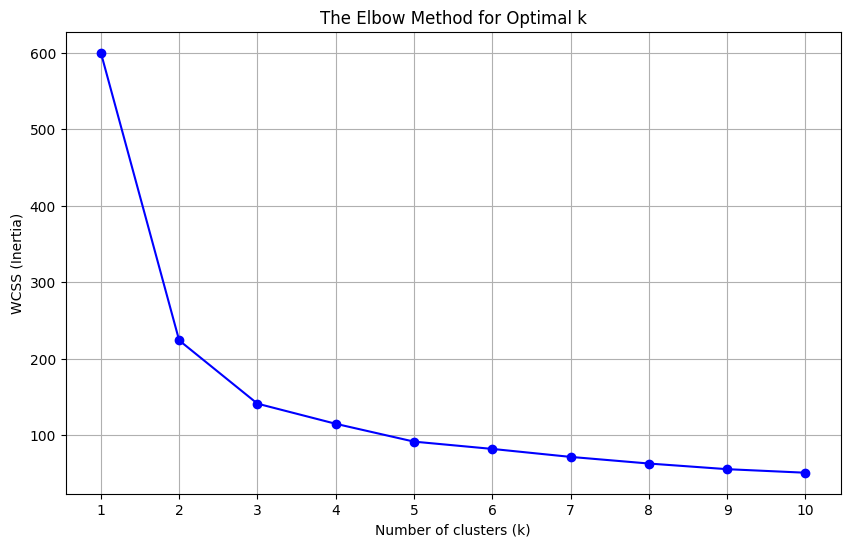

In [7]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, 'bo-')
plt.title('The Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [8]:
print("\nFrom the Elbow Method plot, the optimal number of clusters (k) appears to be 3.")
# The elbow is the point where the WCSS starts to decrease more slowly.


From the Elbow Method plot, the optimal number of clusters (k) appears to be 3.


## 3. Experiment with different values of K.


In [9]:
# Train the K-Means Model with the Optimal k
# Based on the Elbow Method, we choose k=3.

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

In [10]:
# Fit the model and predict the clusters for our data
y_kmeans = kmeans.fit_predict(X_scaled)

In [11]:
# Add the cluster labels to our original dataframe for easier analysis
df['Cluster'] = y_kmeans

In [12]:
print(f"\nK-Means model trained with k={optimal_k}.")
print("First 5 rows with assigned clusters:")
print(df.head())


K-Means model trained with k=3.
First 5 rows with assigned clusters:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


## 4. Evaluate model using accuracy, confusion matrix.


In [13]:
# Visualize the Clusters
# We will create a scatter plot to visualize the clusters.
# Since our data has 4 features, we will visualize using the first two (Sepal Length vs Sepal Width).

plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

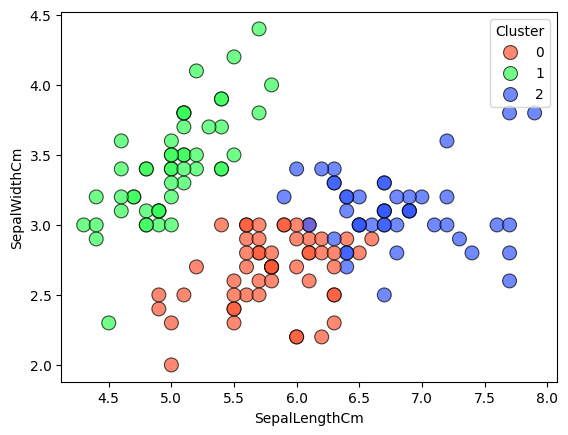

In [14]:
# Plotting the data points for each cluster
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Cluster', data=df,
                palette=['#FF5733', '#33FF57', '#3357FF'], s=100, alpha=0.7, edgecolor='k')

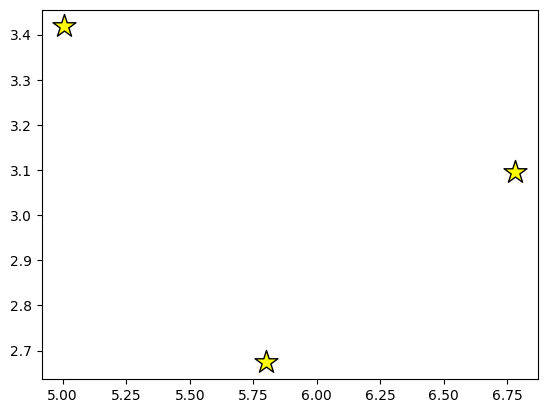

In [15]:
# Plotting the centroids of the clusters
# Note: Centroids are in the scaled space, so we need to inverse_transform them back
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow',
            label='Centroids', marker='*', edgecolor='black')

/tmp/ipython-input-620711136.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


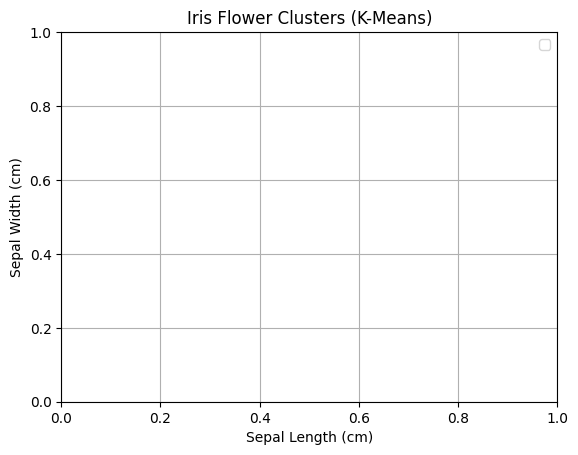

In [16]:
plt.title('Iris Flower Clusters (K-Means)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()

## 5. Visualize decision boundaries.


In [17]:
# Evaluate the Clustering Performance
# Although not required by the task, evaluating the model is a critical step.
# Since we have the true labels ('Species'), we can use extrinsic methods.
# However, in a true unsupervised problem, we use intrinsic methods like the Silhouette Score.

# Silhouette Score measures how similar a data point is to its own cluster compared to other clusters.
# The score ranges from -1 to 1. Higher values indicate better-defined clusters.

silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"\nThe Silhouette Score for k={optimal_k} is: {silhouette_avg:.4f}")
print("A score close to 1 suggests that the clusters are dense and well-separated.")



The Silhouette Score for k=3 is: 0.4590
A score close to 1 suggests that the clusters are dense and well-separated.
